# **Data Project: Causes of Death in Europe (1994-2010)**



## I. Research Question
### "What factors influence standardized death rates across European countries from 1994 to 2010?"


## II. Importing Libraries


In [ ]:
# Get rid of warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import libraries for general use
import numpy as np
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import libraries for machine learning models
""" For regression models
"""
import statsmodels.formula.api as smf

""" For random forest regression
"""
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error, r2_score # metrics for RFR

""" For random forests
"""
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import ensemble

""" For performance testing of tree models
"""
from sklearn.model_selection import train_test_split # data sampling
from sklearn.metrics import accuracy_score # model accuracy check

""" For label encoding
"""
from sklearn.preprocessing import LabelEncoder

## III. Cleaning Data

### 1. Selecting Relevant Columns

In [ ]:
# Read the csv file and load it into a dataframe
data = pd.read_csv("/content/estat_hlth_cd_asdr_en (1).csv")
data

,DATAFLOW,LAST UPDATE,freq,unit,sex,age,icd10,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,F,TOTAL,A-R_V-Y,AL,2004,1267.1,NaN
1,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,F,TOTAL,A-R_V-Y,AT,1994,1124.2,NaN
2,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,F,TOTAL,A-R_V-Y,AT,1995,1105.8,NaN
3,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,F,TOTAL,A-R_V-Y,AT,1996,1096.1,NaN
4,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,F,TOTAL,A-R_V-Y,AT,1997,1060.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
384367,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,T,Y_LT65,Y10-Y34_Y872,UK,2006,3.7,NaN
384368,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,T,Y_LT65,Y10-Y34_Y872,UK,2007,3.8,NaN
384369,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,T,Y_LT65,Y10-Y34_Y872,UK,2008,3.8,NaN
384370,ESTAT:HLTH_CD_ASDR(1.0),17/04/20 23:00:00,A,RT,T,Y_LT65,Y10-Y34_Y872,UK,2009,3.6,NaN


In [ ]:
# Explore the data types
data.dtypes

,0
DATAFLOW,object
LAST UPDATE,object
freq,object
unit,object
sex,object
age,object
icd10,object
geo,object
TIME_PERIOD,int64
OBS_VALUE,float64


In [ ]:
# Explore the columns
data.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'sex', 'age', 'icd10', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [ ]:
# Drop unnecessary columns
drop_cols = ['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG', 'unit']
data = data.drop(drop_cols, axis = 1)

# Change columns' name
data = data.rename(columns={'OBS_VALUE': 'death_rate', 'geo': 'country_code', 'TIME_PERIOD': 'year', 'icd10': 'death_causes'})

data.head(10)

,sex,age,death_causes,country_code,year,death_rate
0,F,TOTAL,A-R_V-Y,AL,2004,1267.1
1,F,TOTAL,A-R_V-Y,AT,1994,1124.2
2,F,TOTAL,A-R_V-Y,AT,1995,1105.8
3,F,TOTAL,A-R_V-Y,AT,1996,1096.1
4,F,TOTAL,A-R_V-Y,AT,1997,1060.0
5,F,TOTAL,A-R_V-Y,AT,1998,1040.1
6,F,TOTAL,A-R_V-Y,AT,1999,1036.5
7,F,TOTAL,A-R_V-Y,AT,2000,1005.4
8,F,TOTAL,A-R_V-Y,AT,2001,965.9
9,F,TOTAL,A-R_V-Y,AT,2002,981.4


### 2. Choosing Relevant Data

In [ ]:
# Unique values in each column BEFORE removing
print(data['sex'].unique(), "\n")
print(data['age'].unique(), "\n")
print(data['death_causes'].unique(), "\n")
print(data['country_code'].unique(), "\n")
print(data['year'].unique(), "\n")

['F' 'M' 'T'] 

['TOTAL' 'Y_GE65' 'Y_LT65'] 

['A-R_V-Y' 'A15-A19_B90' 'ACC' 'ACC_OTH' 'A_B' 'A_B_OTH' 'B15-B19_B942'
 'B20-B24' 'C' 'C00-C14' 'C00-D48' 'C15' 'C16' 'C18-C21' 'C22' 'C25' 'C32'
 'C33_C34' 'C43' 'C50' 'C53' 'C54_C55' 'C56' 'C61' 'C64' 'C67' 'C70-C72'
 'C73' 'C81-C86' 'C88_C90_C96' 'C91-C95' 'C_OTH' 'D00-D48' 'D50-D89' 'E'
 'E10-E14' 'E_OTH' 'F' 'F01_F03' 'F10' 'F_OTH' 'G20' 'G30' 'G_H' 'G_H_OTH'
 'I' 'I20-I25' 'I20_I23-I25' 'I21_I22' 'I30-I51' 'I60-I69' 'I_OTH' 'J'
 'J09-J11' 'J12-J18' 'J40-J44_J47' 'J40-J47' 'J45_J46' 'J_OTH' 'K'
 'K25-K28' 'K70_K73_K74' 'K_OTH' 'L' 'M' 'M_OTH' 'N' 'N00-N29' 'N_OTH' 'O'
 'P' 'Q' 'R' 'R95' 'R96-R99' 'RHEUM_ARTHRO' 'R_OTH' 'TOXICO' 'V01-Y89'
 'V01-Y89_OTH' 'V_Y85' 'W00-W19' 'W65-W74' 'X40-X49' 'X60-X84_Y870'
 'X85-Y09_Y871' 'Y10-Y34_Y872'] 

['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'EU27_2020'
 'EU28' 'FI' 'FR' 'FX' 'HR' 'HU' 'IE' 'IS' 'IT' 'LI' 'LT' 'LU' 'LV' 'MK'
 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK' 'UK'] 



In [ ]:
# Remove aggregate data in sex, age, and country_code
remove = ['TOTAL', 'T', 'EU27_2020', 'EU28']

# Create a list of groups of death causes we want to focus on
cause = ['A_B', 'C', 'D00-D48', 'E', 'F',
         'G_H', 'I', 'J', 'K', 'L', 'M',
         'N', 'O', 'P', 'Q', 'R', 'ACC']

# Use negation (symbol: " ~ "), in combination with .isin() method
data = data[(~data['sex'].isin(remove)) &
            (~data['age'].isin(remove)) &
            (~data['country_code'].isin(remove)) &
            (data['death_causes'].isin(cause))] # Not use negation in the last condition

In [ ]:
# Unique values in each column AFTER removing
print(data['sex'].unique(), "\n")
print(data['age'].unique(), "\n")
print(data['death_causes'].unique(), "\n")
print(data['country_code'].unique(), "\n")
print(data['year'].unique(), "\n")

['F' 'M'] 

['Y_GE65' 'Y_LT65'] 

['ACC' 'A_B' 'C' 'D00-D48' 'E' 'F' 'G_H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P'
 'Q' 'R'] 

['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'FX' 'HR' 'HU' 'IE' 'IS' 'IT' 'LI' 'LT' 'LU' 'LV' 'MK' 'MT' 'NL' 'NO'
 'PL' 'PT' 'RO' 'SE' 'SI' 'SK' 'UK'] 

[2004 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2005 2006 2007
 2008 2009 2010] 



**Death Causes Explanation:**
- [A_B]: Certain infectious and parasitic diseases (e.g. HIV, Turberculosis,...)
- [C]: Malignant neoplasms
- [D00-D48]: Non-malignant neoplasms (benign and uncertain)
- [E]: Endocrine, nutritional and metabolic diseases
- [F]: Mental and behavioural disorders (e.g. Dementia, Alcohol, Drugs,...)
- [G_H]: Diseases of the nervous system and the sense organs (e.g. Parkinson, Alzheimei,...)
- [I]: Diseases of the circulatory system (e.g. Cerebrovascular, Ischemia,...)
- [J]: Diseases of the respiratory system (e.g. Pneumonia, Asthma, Influenza,...)
- [K]: Diseases of the digestive system
- [L]: Diseases of the skin and subcutaneous tissue
- [N]: Diseases of the genitourinary system
- [O]: Pregnancy, childbirth and the puerperium
- [P]: Certain conditions originating in the perinatal period
- [Q]: Congenital malformations, deformations and chromosomal abnormalities
- [R]: Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
- [ACC]: Accidents (e.g. Transport, Fall, Drowning, Self-harm, Poisoning, Assault,...)

### 3. Handling Missing Values and Duplicates

In [ ]:
# Check for missing values
data.isnull().sum()

,0
sex,0
age,0
death_causes,0
country_code,0
year,0
death_rate,202


In [ ]:
# Check for the ratio of missing values
data.isnull().sum() / len(data)

,0
sex,0.000000
age,0.000000
death_causes,0.000000
country_code,0.000000
year,0.000000
death_rate,0.006012


In [ ]:
# Fill in NA with the mean value of the column having NA
data['death_rate'] = data['death_rate'].fillna(data['death_rate'].mean())

In [ ]:
# Check for duplicates
data[data.duplicated()==True]

# No duplicates found, but if there were, run this code:
# data.drop_duplicates(inplace = True)

,sex,age,death_causes,country_code,year,death_rate


## IV. Preprocessing Data for ML Models

In [ ]:
# Create 4 lists of country codes based on 4 regions
west_eu = ['BE', 'FR', 'LU', 'NL', 'DE', 'IE', 'AT', 'CH', 'UK', 'LI', 'FX']
east_eu = ['PL', 'CZ', 'SK', 'HU', 'RO', 'BG', 'LT', 'LV', 'EE', 'HR']
north_eu = ['NO', 'SE', 'DK', 'FI', 'IS']
south_eu = ['ES', 'PT', 'IT', 'EL', 'MT', 'CY', 'SI', 'RS', 'MK', 'MT', 'AL']

In [ ]:
""" Turn some categorical columns into numerical form
"""
# Use one-hot encoding to transform country codes into 4 European regions
data['west_eu'] = data['country_code'].isin(west_eu).astype(int)
data['east_eu'] = data['country_code'].isin(east_eu).astype(int)
data['north_eu'] = data['country_code'].isin(north_eu).astype(int)
data['south_eu'] = data['country_code'].isin(south_eu).astype(int)

# Label encoding
le = LabelEncoder()
data['age'] = le.fit_transform(data['age']) # Convert this into 0 (for Female) and 1 (for Male)
data['sex'] = le.fit_transform(data['sex']) # Convert this into 0 (for Y_GE65: age over 65) and 1 (for Y_LT65: age under 65)

# Transform year column to start from 1
start_year = data['year'].min() # 1994
data['year'] = data['year'] - start_year + 1

## V. Creating ML Models

In [ ]:
data

,sex,age,death_causes,country_code,year,death_rate,west_eu,east_eu,north_eu,south_eu
43935,0,0,ACC,AL,11,42.5,0,0,0,1
43936,0,0,ACC,AT,1,93.2,1,0,0,0
43937,0,0,ACC,AT,2,89.2,1,0,0,0
43938,0,0,ACC,AT,3,93.7,1,0,0,0
43939,0,0,ACC,AT,4,84.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
247331,1,1,R,UK,13,3.3,1,0,0,0
247332,1,1,R,UK,14,3.5,1,0,0,0
247333,1,1,R,UK,15,3.4,1,0,0,0
247334,1,1,R,UK,16,3.4,1,0,0,0


In [ ]:
""" Multiple Regression Model
"""
reg = smf.ols('death_rate ~ C(death_causes) + age + sex + year + west_eu + south_eu + east_eu + north_eu', data = data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1384.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:43:24   Log-Likelihood:            -2.5320e+05
No. Observations:               33600   AIC:                         5.064e+05
Df Residuals:                   33577   BIC:                         5.066e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
""" Random Forest Regression Model
"""
# Prepare data for random forest regression
draft = data # We don't want to use main dataframe for this ML model
df_encoded = pd.get_dummies(data['death_causes'])
draft = pd.concat([draft, df_encoded.astype(int)], axis=1)

# Build the model
y = draft['death_rate'] # Dependent variable
x = draft.drop(['death_rate', 'country_code', 'death_causes'], axis=1) # Independent variables except these 3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42) # Split train and test sets

deathForest = RFR(n_estimators = 567, n_jobs = -1, max_depth = 38,
                    min_samples_leaf = 32, min_samples_split = 13,
                    random_state = 42)

# Train the model on train data
deathForest.fit(x_train, y_train)

# Apply model on test data
pred = deathForest.predict(x_test)

# Model evaluation metric
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

# Print results
print(mse, "\n")
print(r2)

21843.07947521195 
 0.9450531229985245


<Axes: >

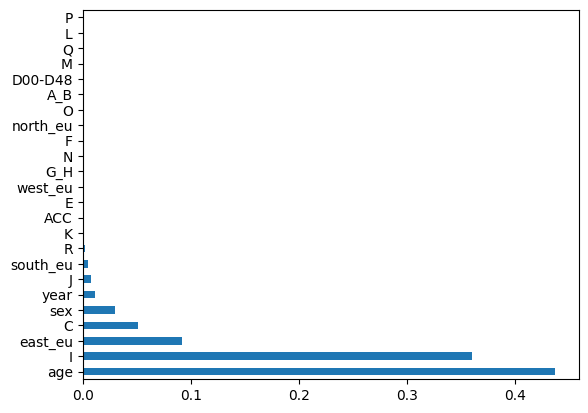

In [ ]:
# Plot feature importance
feat_importances = pd.Series(deathForest.feature_importances_, index=x_train.columns)
feat_importances.nlargest(24).plot(kind='barh')

## VI. Figures

In [ ]:
# Add region column to use for color in line chart and aggregate death rate
region = []

# Loop through country code to assign correct region
for i in data['country_code']:
  if i in west_eu:
    region.append('west_eu')
  elif i in east_eu:
    region.append('east_eu')
  elif i in north_eu:
    region.append('north_eu')
  elif i in south_eu:
    region.append('south_eu')

region = pd.DataFrame(region)
data['region'] = region[0].values # Convert into a NumPy array and assign to region column in 'data' dataframe

In [ ]:
# Figure 1
fig1 = data.groupby(['region', 'year'])['death_rate'].sum().reset_index()
line = px.line(fig1, x = 'year', y ='death_rate', color = 'region', title='Figure 1: Death Rate in European Regions (1994-2010)')
line.update_layout(title_x=0.5)

In [ ]:
# Figure 2
fig2 = data.groupby(['region', 'death_causes'])['death_rate'].sum().reset_index()
bar = px.bar(fig2, x = 'death_causes', y = 'death_rate', color = 'death_causes',
             title='Figure 2: Total Death Rate of Each Death Cause in European Countries (1994-2010)')
bar.update_layout(title_x=0.5)